In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (9)\\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#shape of the dataset
df.shape

(13320, 9)

In [5]:
#let's determine the number of samples present in our dataset by the area type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#we need to drop some irrelevant columns for simplification purpose
df1 = df.drop(['area_type','availability','society','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
#handling the null or missing values
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#there is 1 msising value in location, so we can drop that
#there are 16 missing values in size, we would drop that as well
#there are 73 missing values in bath, we would fill that
df1.dropna(subset=['location','size'], inplace=True)

In [9]:
#filling the missing values of the bath feature with the median
df1['bath'] = df1['bath'].fillna(df1['bath'].median())

In [10]:
#confirm if there is still any missing value
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
#observe that the size feature has variations in its sample appearance
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#we need to convert the size to numbers that specify the number of bedrooms
#to do that, we have to split the samples then take the first index which represents the number
df1['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0])) 
df1.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
#now the size column can be dropped
df1.drop('size',axis=1,inplace=True)

In [14]:
#there is also a variation in the appearance of the total_sqft feature
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
#some of the samples appear in ranges
#create a function that identifies this samples
#first, we know that the data type of those samples would not be float. 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
#we would display the dataset with total_sqft values that are not float
df1[~df1['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bedroom
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2


In [17]:
#to handle this, define a function that produces the average of the two numbers
def range_converter(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
#apply the function to the sqft column
df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(range_converter)
df2.head()

,location,total_sqft,bath,price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [19]:
#confirm if it was applied. we use the value of sqft on index 56
df2['total_sqft'].loc[30]

2475.0

In [20]:
#Alternatively, access the value using iloc
df2.iloc[30][1]

2475.0

In [21]:
#the range_converter function replaced the range values in the total_sqft column with the average of the two numbers.
#it also dropped every other sample that was not a float datatype as we specified it to return None
#now our dataset looks somewhat okay

In [22]:
#create the price per sqft column as it is an important feature in the real estate industry
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*10000/df3['total_sqft'] #the price is in lakh hence it was multiplied by 100000
df3.head()

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,624.589086
4,Kothanur,1200.0,2.0,51.00,2,425.000000


In [23]:
#handling the location feature, find out how many unique locations are in the dataset
len(df3.location.unique())

1304

In [24]:
#the number is too large for one hot encoding to be performed as it would lead to a large number of columns
#find out how many times a location appears
df3['location'] = df3['location'].apply(lambda x: x.strip())

location_statistics = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_statistics

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
#find the number of locations that appear 10 times or less
len(location_statistics[location_statistics<=10])

1052

In [26]:
location_less_than_10 = location_statistics[location_statistics<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
#convert these locations that appear less than ten times to 'other'
df3['location']  = df3['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [28]:
len(df3['location'].unique())

242

In [29]:
#the unique values in the location column has been reduced to 242

In [30]:
#upon analysis, a room is approximately 300sqft. This can be used as a threshold to remove outliers in the total_sqft column
#display the outliers
df3[df3['total_sqft']/df3['bedroom']<300]

,location,total_sqft,bath,price,bedroom,price_per_sqft
9,other,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,1350.0,7.0,85.0,8,629.629630
70,other,500.0,3.0,100.0,3,2000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,1557.142857
13279,other,1200.0,5.0,130.0,6,1083.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,909.090909
13303,Vidyaranyapura,774.0,5.0,70.0,5,904.392765


In [31]:
#create a new dataset that does not contain these outliers
df4 = df3[df3['total_sqft']/df3['bedroom']>300]
df4.shape[0]

12331

In [32]:
#remove outliers in the price_per-sqft column using mean and std
#the mean and std should be based on their locations as that is an important factor affecting price

def no_ppsft_out(df):
    no_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        without_outlier = subdf[(subdf['price_per_sqft']>(mean-std))&(subdf['price_per_sqft']<=(mean+std))]
        no_out = pd.concat([no_out,without_outlier],ignore_index=True)
    return no_out
        

In [33]:
df5 = no_ppsft_out(df4)
df5.shape

(10065, 6)

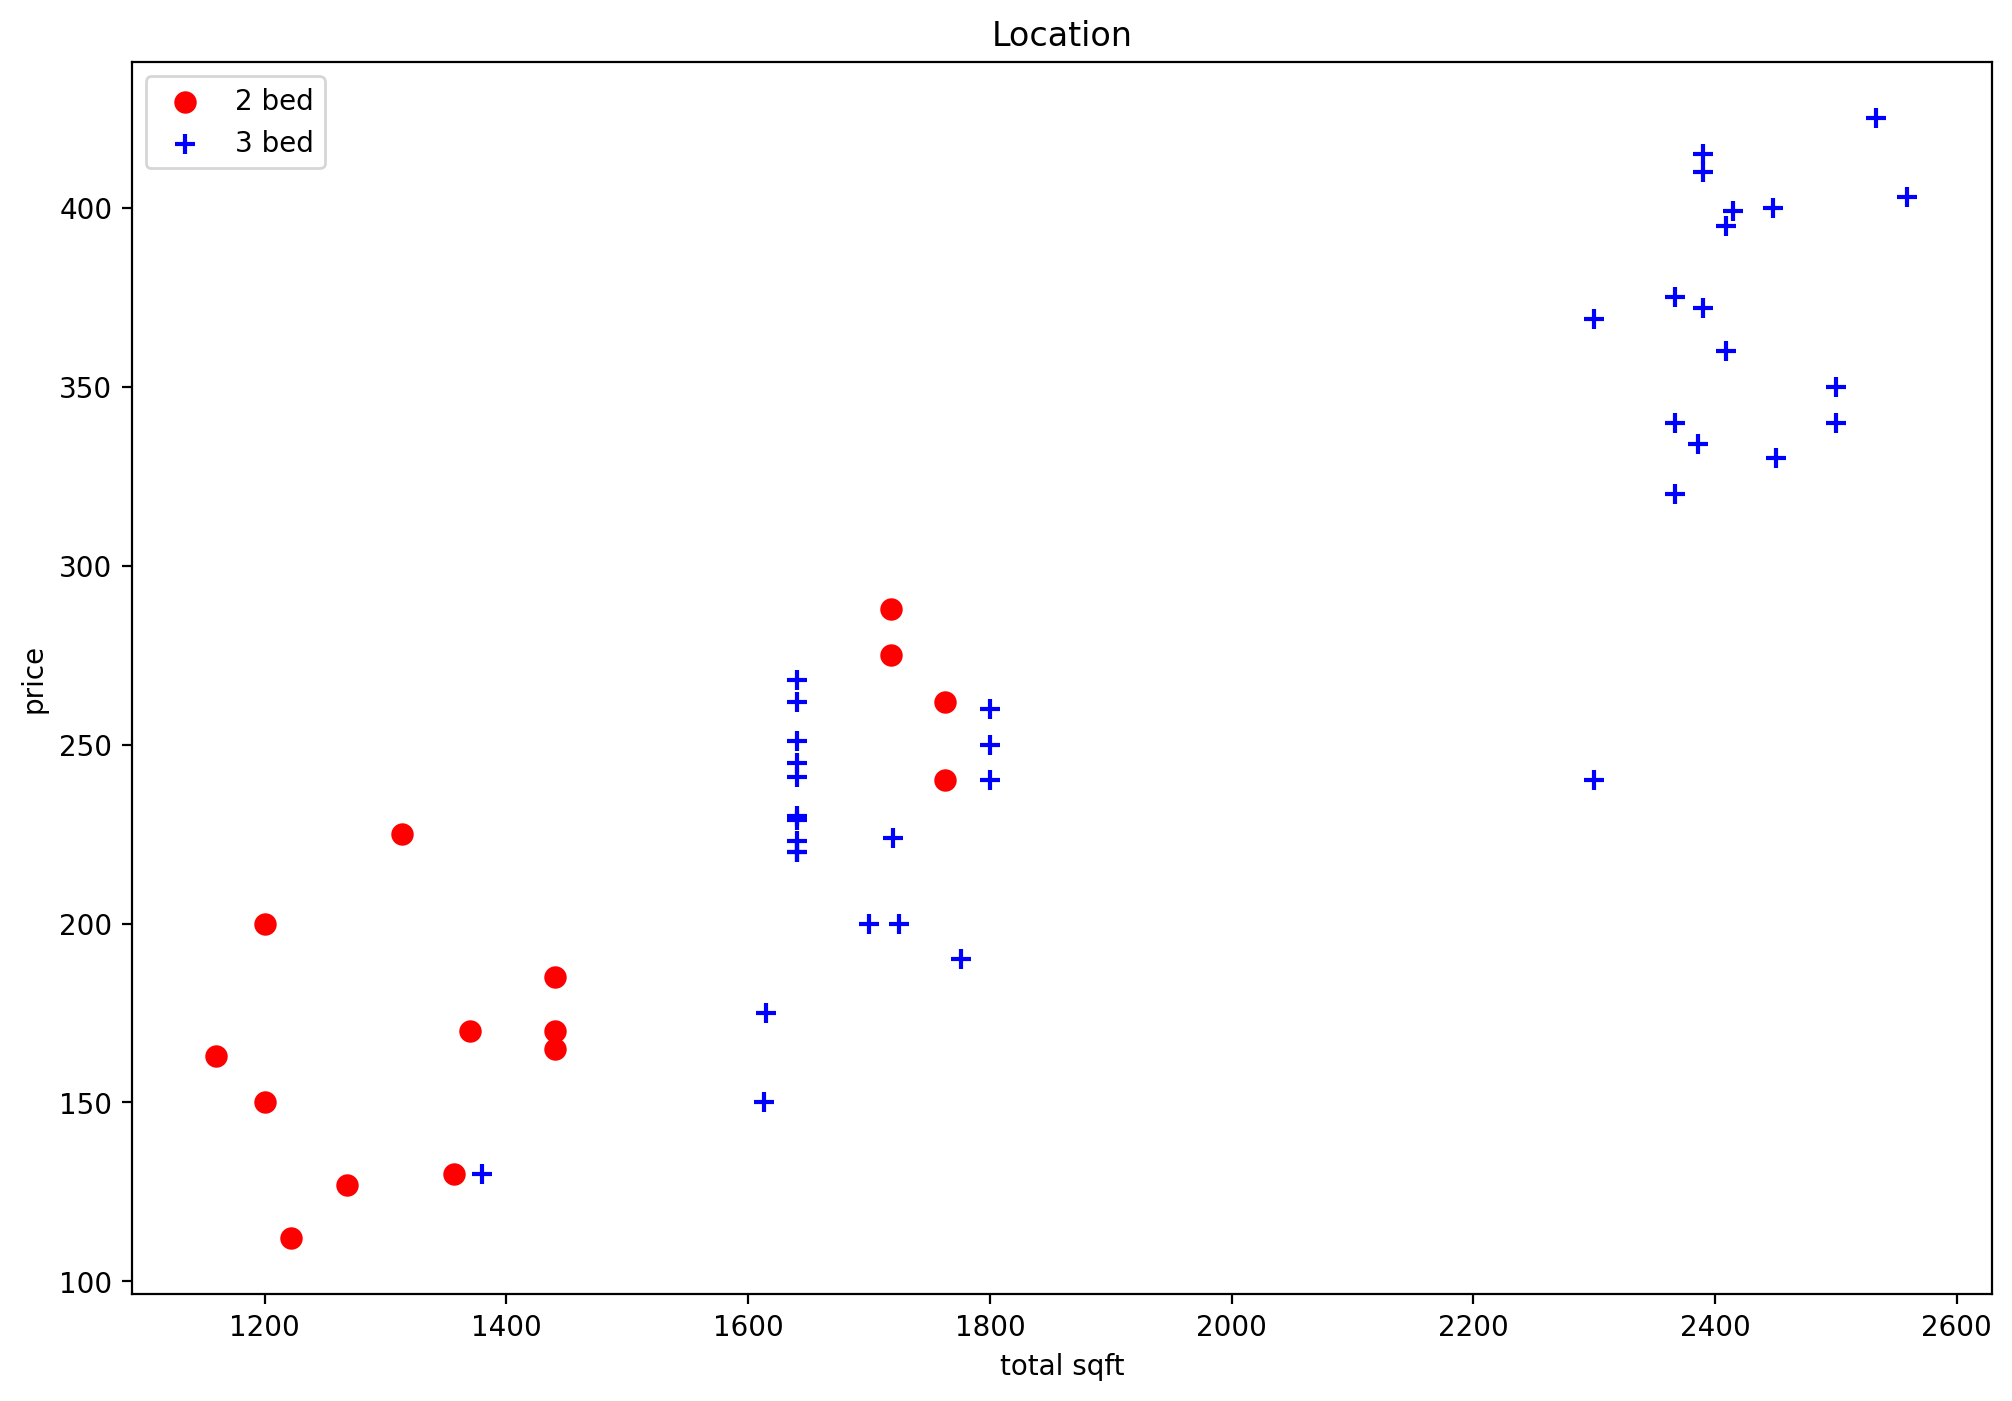

In [34]:
#visualize the relatonship between the number of bedrooms and price based on a location
def plot_scatter(df,location):
    bed2 = df[(df['location']==location)&(df['bedroom']==2)]
    bed3 = df[(df['location']==location)&(df['bedroom']==3)]
    matplotlib.rcParams['figure.figsize'] = (12,8)
    plt.scatter(bed2.total_sqft,bed2.price,color='red',label='2 bed',s=50)
    plt.scatter(bed3.total_sqft,bed3.price,color='blue',marker='+',label='3 bed',s=50)
    plt.xlabel('total sqft')
    plt.ylabel('price')
    plt.title('Location')
    plt.legend()
    plt.show()
    
plot_scatter(df5, 'Rajaji Nagar')

In [35]:
#there are outliers in the bedroom column from the scatterplot 
#some 2bed apartments cost more than the 3bed apartment for the same total sqft and same location
def rem_bed_out(df):
    exclude_indices = np.array([])
    bed_stat = {}
    for location, df_location in df.groupby('location'):
        for bed,df_bed in df_location.groupby('bedroom'):
            bed_stat[bed] = {
                 'mean': np.mean(df_bed.price_per_sqft),
                 'std': np.std(df_bed.price_per_sqft),
                 'count': df_bed.shape[0]
                        }
        for bed, df_bed in df_location.groupby('bedroom'):
            stats = bed_stat.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, df_bed[(df_bed.price_per_sqft<(stats['mean']))].index.values)
    return df.drop(exclude_indices ,axis='index')

In [36]:
#remove the outliers
df6 = rem_bed_out(df5)
df6.shape

(7177, 6)

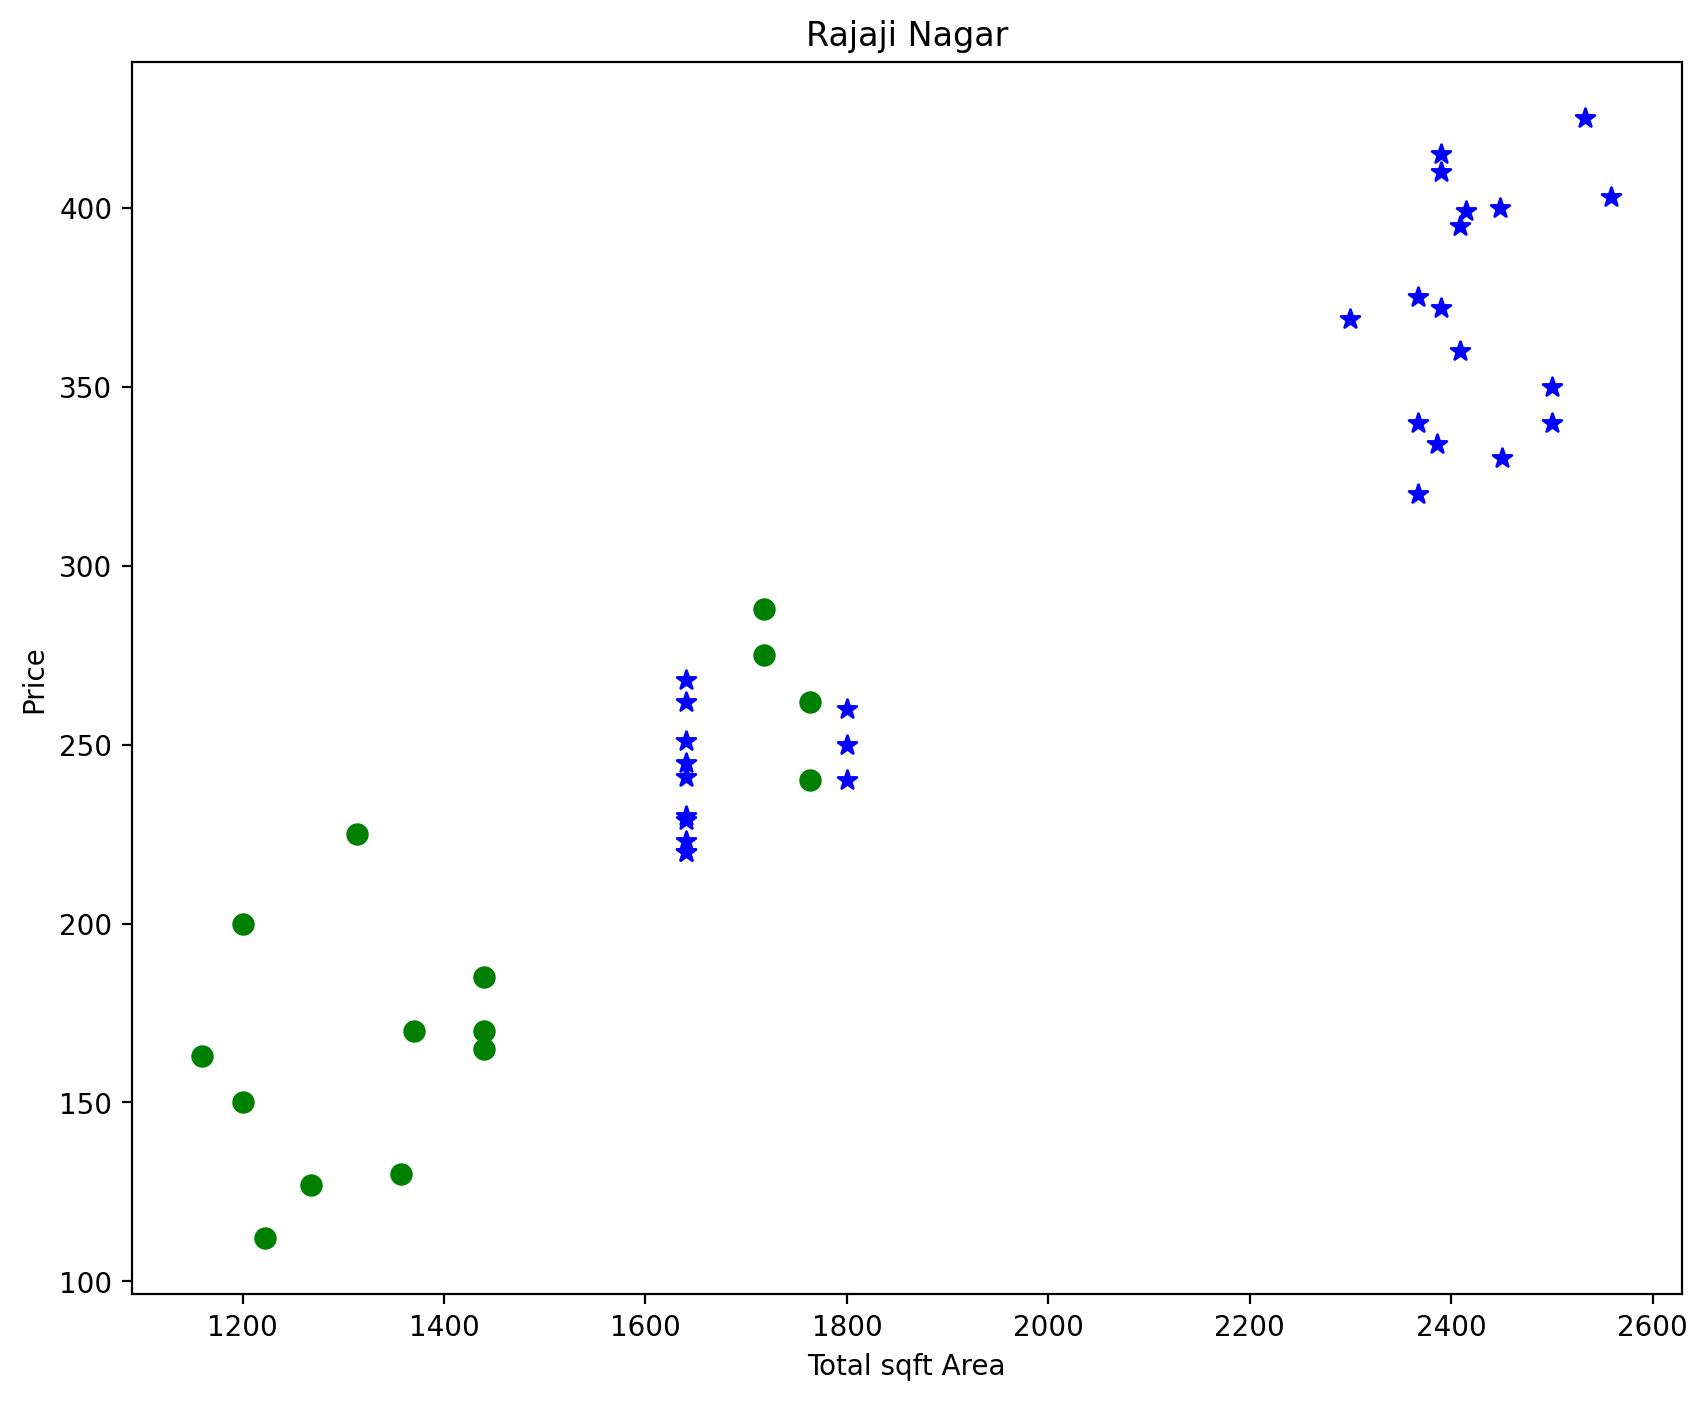

In [37]:
#let's visualize the scatter plot again
def plot_scatter_again(df,location):
    df_bed2 = df[(df.location==location)&(df.bedroom==2)]
    df_bed3 = df[(df.location==location)&(df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (10,8)
    plt.scatter(df_bed2.total_sqft,df_bed2.price,color='green',label='2_bed',s=50)
    plt.scatter(df_bed3.total_sqft,df_bed3.price,color='blue',marker='*',label='3_bed',s=50)
    plt.xlabel('Total sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend
    plt.show

plot_scatter_again(df6, 'Rajaji Nagar')

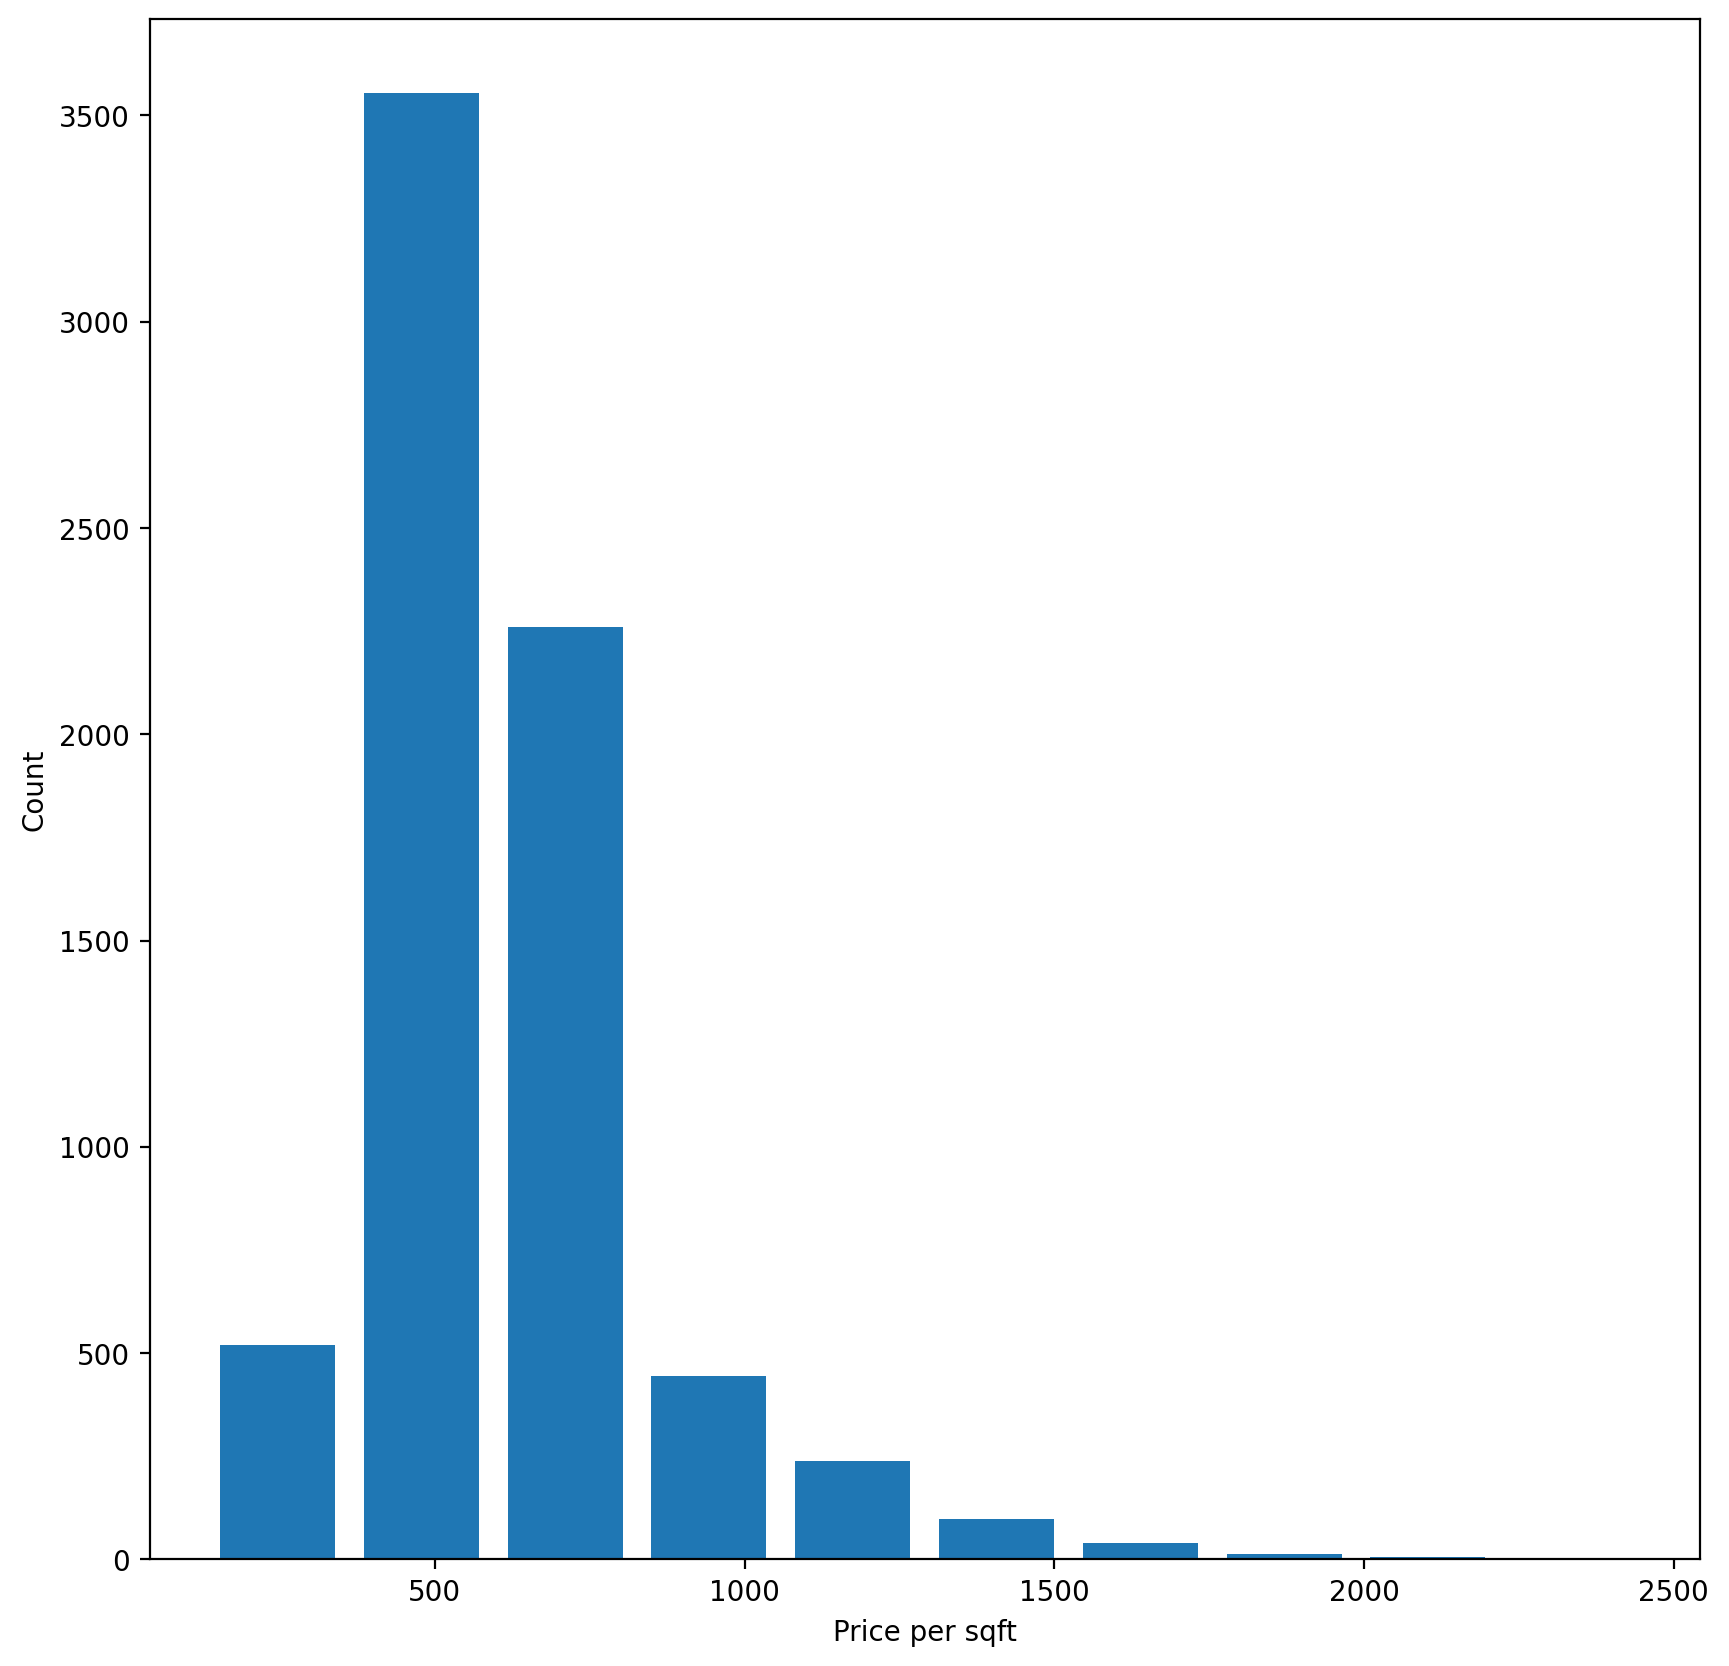

In [38]:
matplotlib.rcParams['figure.figsize'] = (10,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

In [39]:
#handling bathroom feature
df6.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

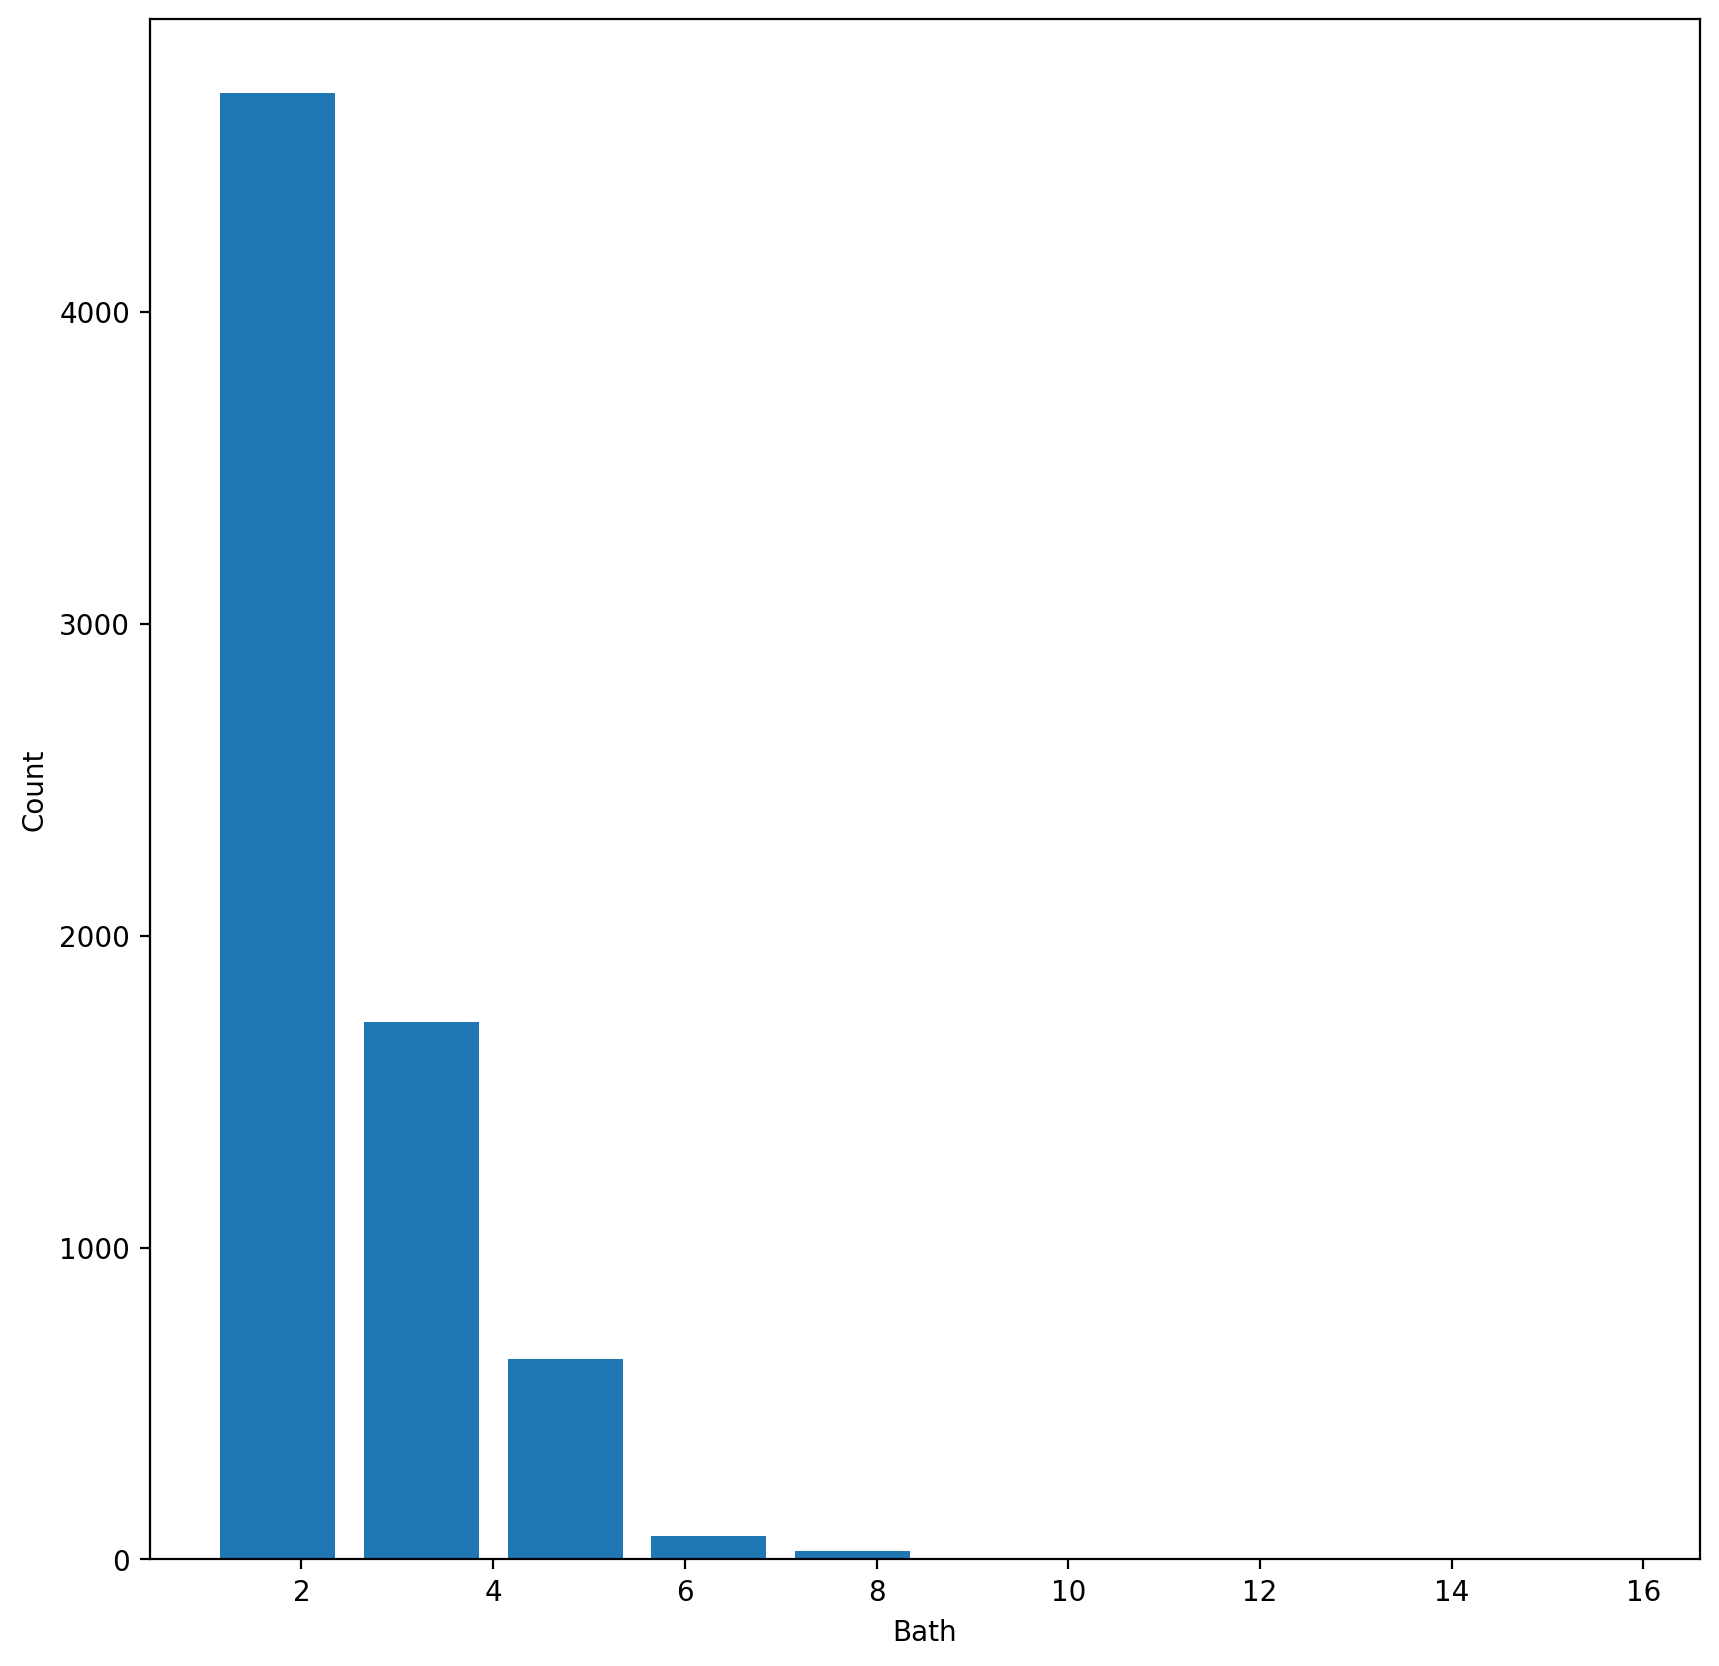

In [40]:
#plot a histogram to see the count of the bath feature
matplotlib.rcParams['figure.figsize'] = (10,10)
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel('Bath')
plt.ylabel('Count')
plt.show()

In [41]:
#you can see that most apartments have between 1 to 6 bathrooms
#according to real estate statistics, the number of bathrooms should be less than the number of rooms plus 2
#use that information to remove outliers in the dataset

df6[df6.bath>(df6.bedroom+2)]

,location,total_sqft,bath,price,bedroom,price_per_sqft
1572,Chikkabanavar,2460.0,7.0,80.0,4,325.203252
5132,Nagasandra,7000.0,8.0,450.0,4,642.857143
6603,Thanisandra,1806.0,6.0,116.0,3,642.303433
8280,other,11338.0,9.0,1000.0,6,881.989769


In [42]:
#new dataset without those outliers
df7  = df6[df6.bath<(df6.bedroom+2)]
df7.shape

(7102, 6)

In [43]:
#drop some features before training
#the fetaure to drop there would be the price_per_sqft as it was only implemented for outlier detection

df8 = df7.drop('price_per_sqft',axis=1)
df8.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [44]:
#the model is trained on numerical data, so convert the location to feature to numerical data using encoding
dummies = pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#now concatenate the dummy dataset to the initial dataset.
#remove one column from the dummy dataset to prevent dummy variable trap
df9  = pd.concat([df8,dummies.drop('other',axis=1)],axis=1)
df9.head()

,location,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
#since the location feature has been encoded, it can be dropped
df9.drop('location',axis=1,inplace=True)

In [47]:
df9.shape

(7102, 245)

In [48]:
#split the dataset into independent and dependent variables
x = df9.drop('price',axis=1)
y = df9.price #target variable


In [49]:
#implement tarin test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train),len(x_test)

(5681, 1421)

In [50]:
#use linear regression to build the model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.844292855663504

In [51]:
#implement cross validation technique for optimization
from sklearn.model_selection import ShuffleSplit,cross_val_score
#shuffle split ensures proper distribution of the training and testing data in each fold 
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(lr_clf,x,y,cv=cv)

array([0.86212432, 0.81954611, 0.78079954, 0.86680009, 0.81840284])

In [52]:
#perfrom hyper parameter tuning using other regressors and parameters
#implement grid searchcv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def model_performance(x,y):
    models = {
        'Linear Regression':{
            'model': LinearRegression(),
             'params':{
                 'fit_intercept':[True,False]
             }
        },
        'Lasso Regression':{
            'model':Lasso(),
            'params':{
                    'alpha':[1,2],
                    'selection':['random','cyclic']
            }
        },
        'Decision Tree Regression':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error','friedman_mse'],
                'splitter':['random','best']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,m_clf in models.items():
        gs_clf = GridSearchCV(m_clf['model'],m_clf['params'],cv=cv,return_train_score=False)
        gs_clf.fit(x,y)
        scores.append(
                      {
                      'model':model_name,
                      'best_params':gs_clf.best_params_,
                      'best_score':gs_clf.best_score_
                      }
                     )
    return pd.DataFrame(scores,columns=['model','best_params','best_score'])
model_performance(x,y)

,model,best_params,best_score
0,Linear Regression,{'fit_intercept': True},0.829535
1,Lasso Regression,"{'alpha': 1, 'selection': 'cyclic'}",0.685652
2,Decision Tree Regression,"{'criterion': 'squared_error', 'splitter': 'ra...",0.766703


In [53]:
#define a function to predict price 
def predict_price(location,sqft,bath,bedroom):
    loc_index = np.where(x.columns==location)[0][0]
    
    feat = np.zeros(len(x.columns))
    feat[0] = sqft
    feat[1] = bath
    feat[2] = bedroom
    
    if loc_index>=0:
        feat[loc_index] = 1
    return lr_clf.predict([feat])[0]

In [54]:
#predict
print(predict_price('Rajaji Nagar',1000,2,2))
print(predict_price('Rajaji Nagar',1000,2,3))

214.69088515583974
212.0758987157297


In [55]:
#save the model using pickle
import pickle
with open('bangalore house price.pickle_model','wb') as f:
    pickle.dump(lr_clf,f)

In [56]:
#take care of the case in the upper column, i.e convert them to lower case for simplicity
import json
columns = {
    'data_columns': [column.lower() for column in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))